# Importing all required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import pickle
import warnings
warnings.filterwarnings("ignore") 
import datetime as dt
from datetime import datetime
import plotly.express as px


# read Data

In [2]:
df_clean = pd.read_csv('D:/My_Project/supply chain/DataCoSupplyChainDataset.csv/clean_data.csv')
df_clean.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Price,shipping date (DateOrders),Shipping Mode,Full_Name,day_shipping,month_shipping,year_shipping,day_order,month_order,year_order
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,327.75,2018-02-03 22:56:00,Standard Class,CallyHolloway,3,2,2018,31,1,2018
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,327.75,2018-01-18 12:27:00,Standard Class,IreneLuna,18,1,2018,13,1,2018
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,327.75,2018-01-17 12:06:00,Standard Class,GillianMaldonado,17,1,2018,13,1,2018
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,327.75,2018-01-16 11:45:00,Standard Class,TanaTate,16,1,2018,13,1,2018
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,327.75,2018-01-15 11:24:00,Standard Class,OrliHendricks,15,1,2018,13,1,2018


## EDA

## How many late deliverys?


In [3]:
delivery_status_counts = df_clean['Delivery Status'].value_counts().to_frame().reset_index()
delivery_status_counts

,Delivery Status,count
0,Late delivery,98977
1,Advance shipping,41592
2,Shipping on time,32196
3,Shipping canceled,7754


In [4]:
fig = px.pie(delivery_status_counts, values=delivery_status_counts['count'], names=delivery_status_counts['Delivery Status'], title='Delivery Status Distribution')
fig.show()


- 54.8% orders were delivered late.
- 23% orders were shipped in advance.
- 17.8% orders were shipped on time.
- 4.3% of shipping were canceled

## Payment Type Distribution


In [5]:
payment_counts = df_clean['Type'].value_counts().to_frame().reset_index()
payment_counts

,Type,count
0,DEBIT,69295
1,TRANSFER,49883
2,PAYMENT,41725
3,CASH,19616


In [6]:
fig = px.pie(payment_counts, values=payment_counts['count'], names=payment_counts['Type'], title='Payment Type Distribution')
fig.show()

- 38.4% people used debit payment.
- 27.6% people used transfer sysytem.
- 23.1% people used payment system.
- 10.9% people used cash payment.

## Payment delivery status

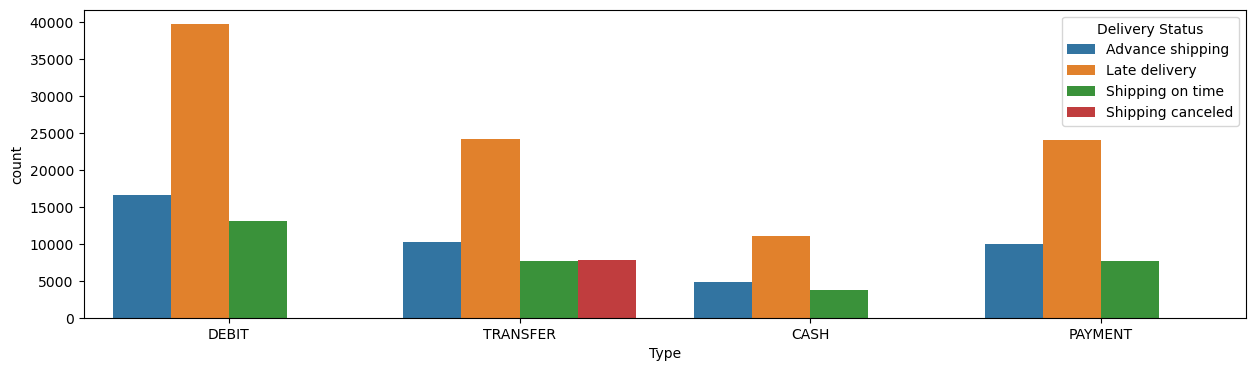

In [7]:
plt.figure(figsize=(15,4))
sns.countplot(x ='Type',hue='Delivery Status' ,data =df_clean )
plt.show()

## What is the average benefit per order?


In [ ]:
average_benefit_per_order = df_clean.groupby('Category Name')['Benefit per order'].mean().sort_values(ascending= False).to_frame().reset_index()
average_benefit_per_order

,Category Name,Benefit per order
0,Computers,157.594593
1,Garden,69.097128
2,Crafts,52.750351
3,Cameras,51.165203
4,Fishing,43.649106
5,Children's Clothing,41.684202
6,Sporting Goods,35.066135
7,Music,33.263410
8,Camping & Hiking,31.135230
9,Consumer Electronics,30.680742


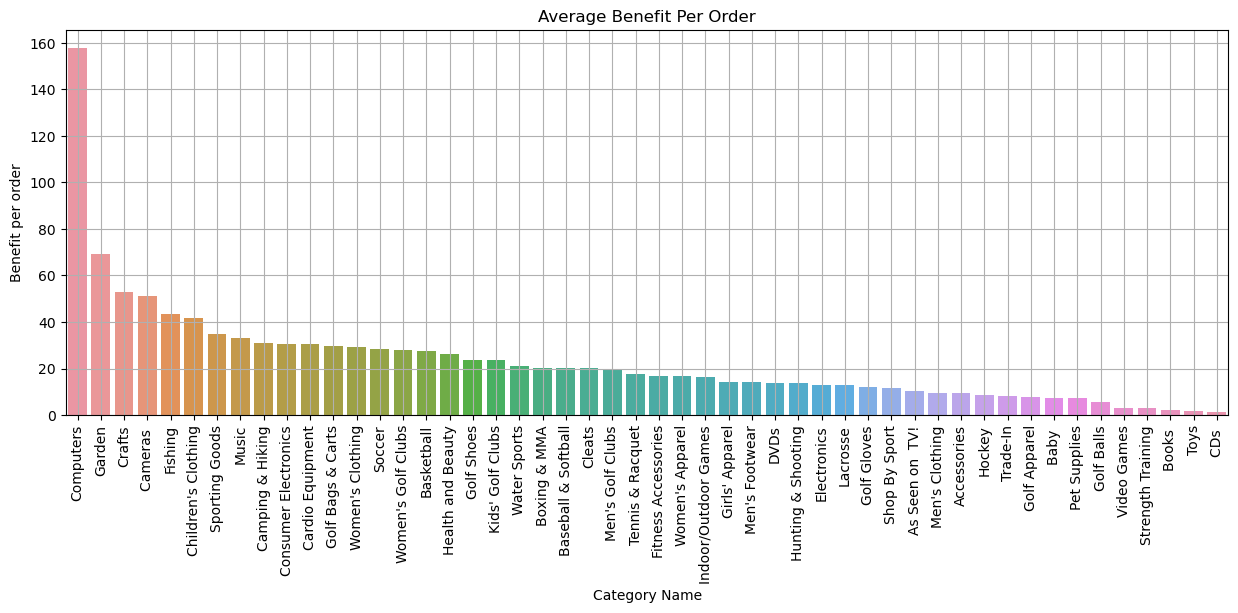

In [ ]:
# Create the bar chart
plt.figure(figsize=(15,5))
sns.barplot(x='Category Name', y='Benefit per order', data=average_benefit_per_order)
plt.xticks(rotation=90)
plt.title('Average Benefit Per Order')
plt.grid(True)
plt.show()

- Highest average benefit per order was done for computers and lowest was for CDs

## Which Categories were delivered late?

In [11]:
Categories_Late = df_clean.loc[df_clean["Delivery Status"] == "Late delivery", ["Category Name"]]

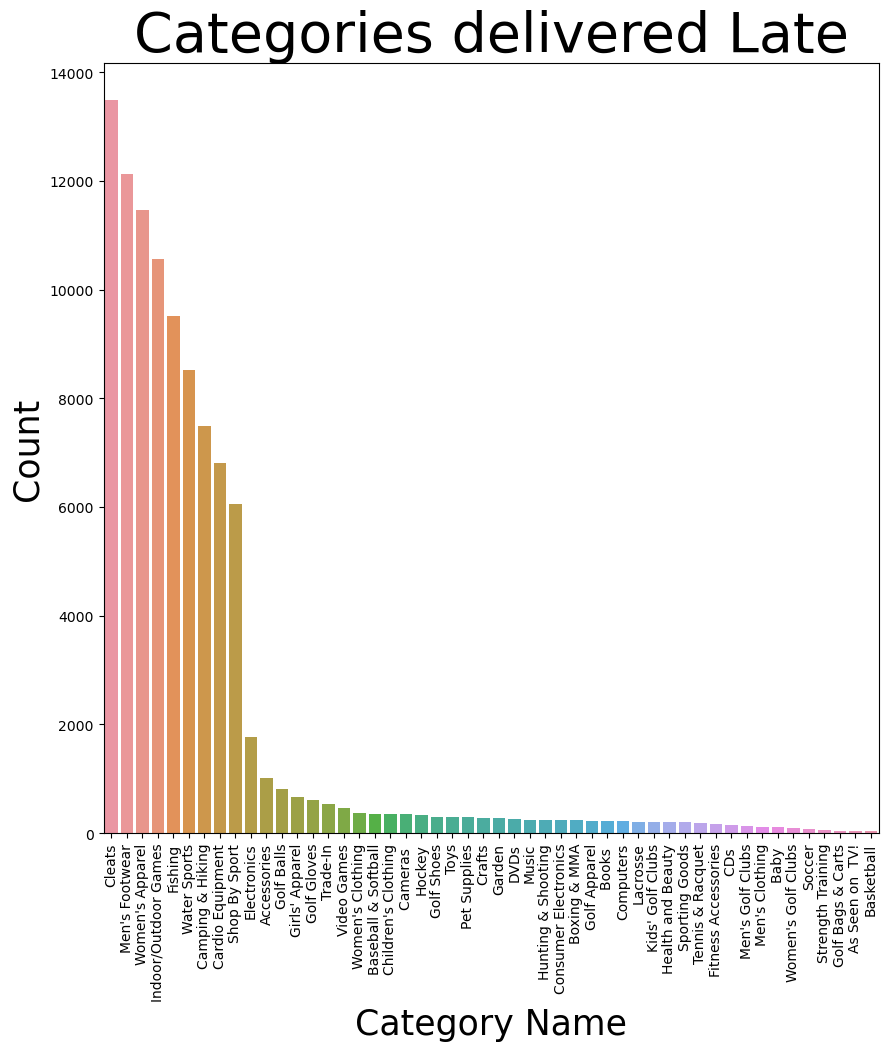

In [12]:
plt.figure(figsize=(10,10))
sns.countplot(x="Category Name", data=Categories_Late, order=Categories_Late['Category Name'].value_counts().sort_values(ascending=False).index)
plt.xticks(rotation='vertical')
plt.title('Categories delivered Late', fontsize=40)
plt.ylabel('Count', fontsize=25)
plt.xlabel('Category Name', fontsize=25)
plt.show()

- There is no clear relationship between category and late delivery, as the distribution of categories and the categories delivered late appear to be proportional.

## What are the top-selling categories and products?

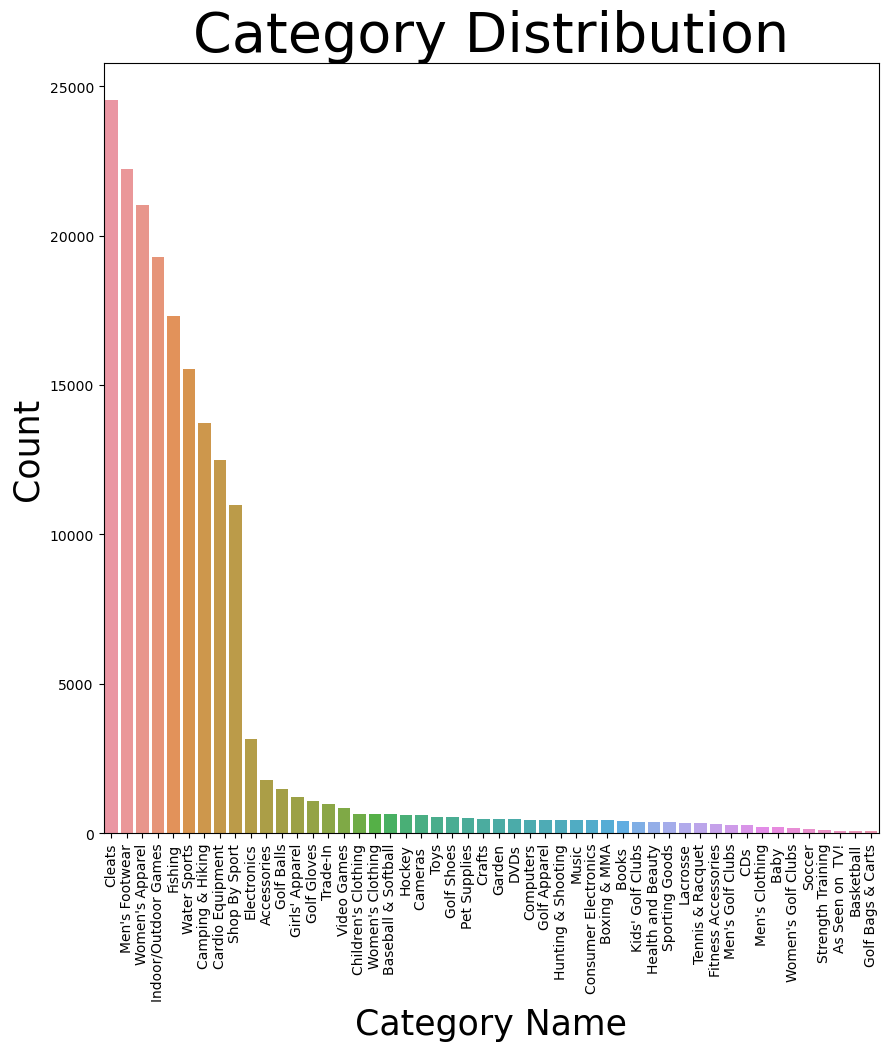

In [13]:
category_counts = df_clean['Category Name'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation='vertical')
plt.title('Category Distribution', fontsize=40)
plt.ylabel('Count', fontsize=25)
plt.xlabel('Category Name', fontsize=25)
plt.show()

- Cleats were the top selling category and Golf Bags & Carts were the lowest selling category

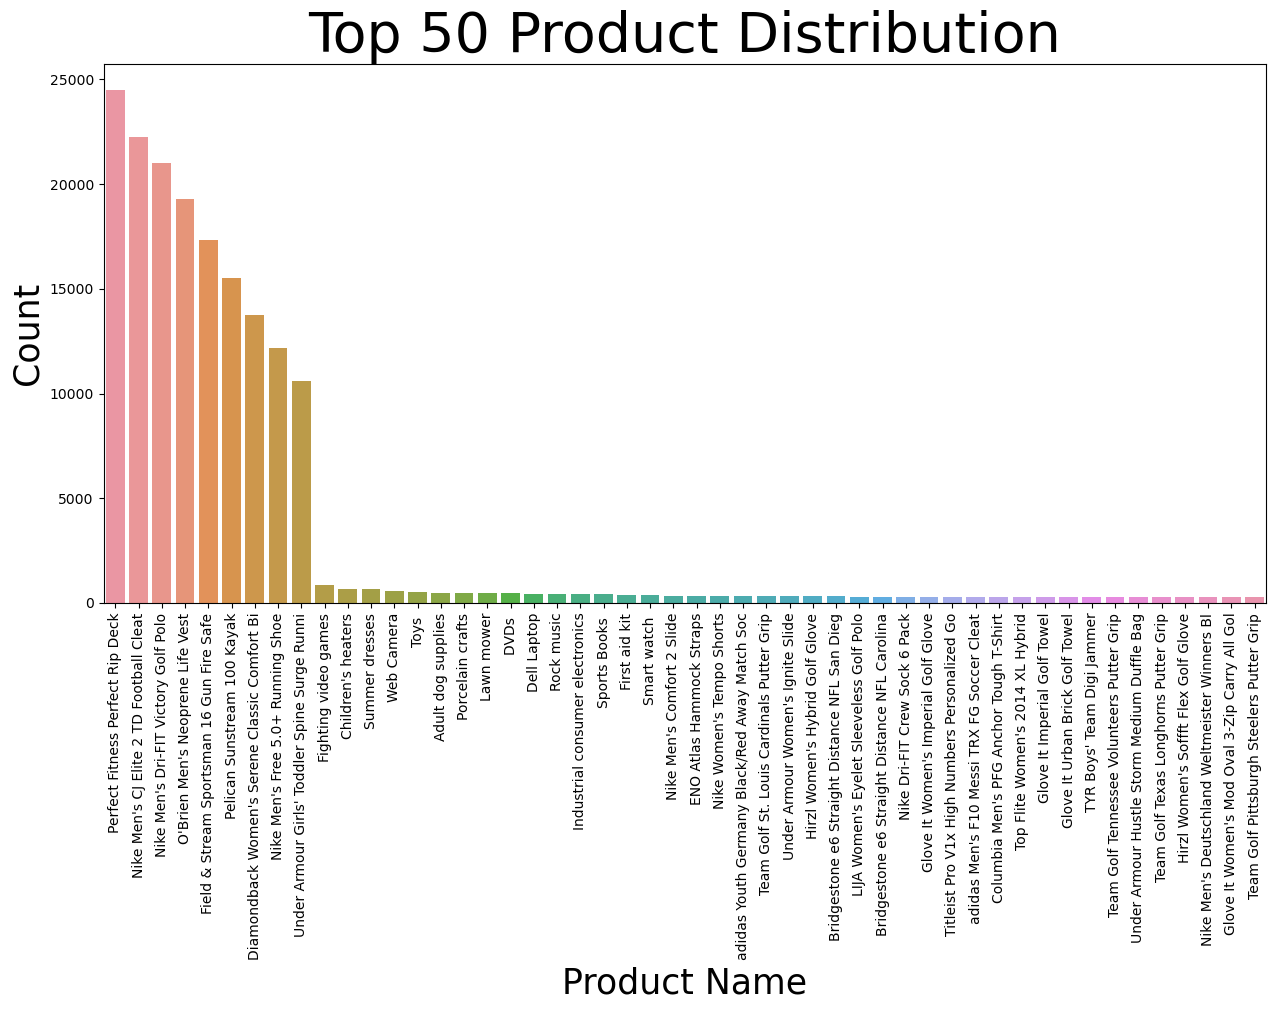

In [15]:
product_counts = df_clean['Product Name'].value_counts().sort_values(ascending=False).head(50)
plt.figure(figsize=(15,7))
sns.barplot(x=product_counts.index, y=product_counts.values)
plt.xticks(rotation='vertical')
plt.title('Top 50 Product Distribution', fontsize=40)
plt.ylabel('Count', fontsize=25)
plt.xlabel('Product Name', fontsize=25)
plt.show()

- Perfect Fitness Perfect Rip Deck were the highest selling product.

## Country wise Distribution

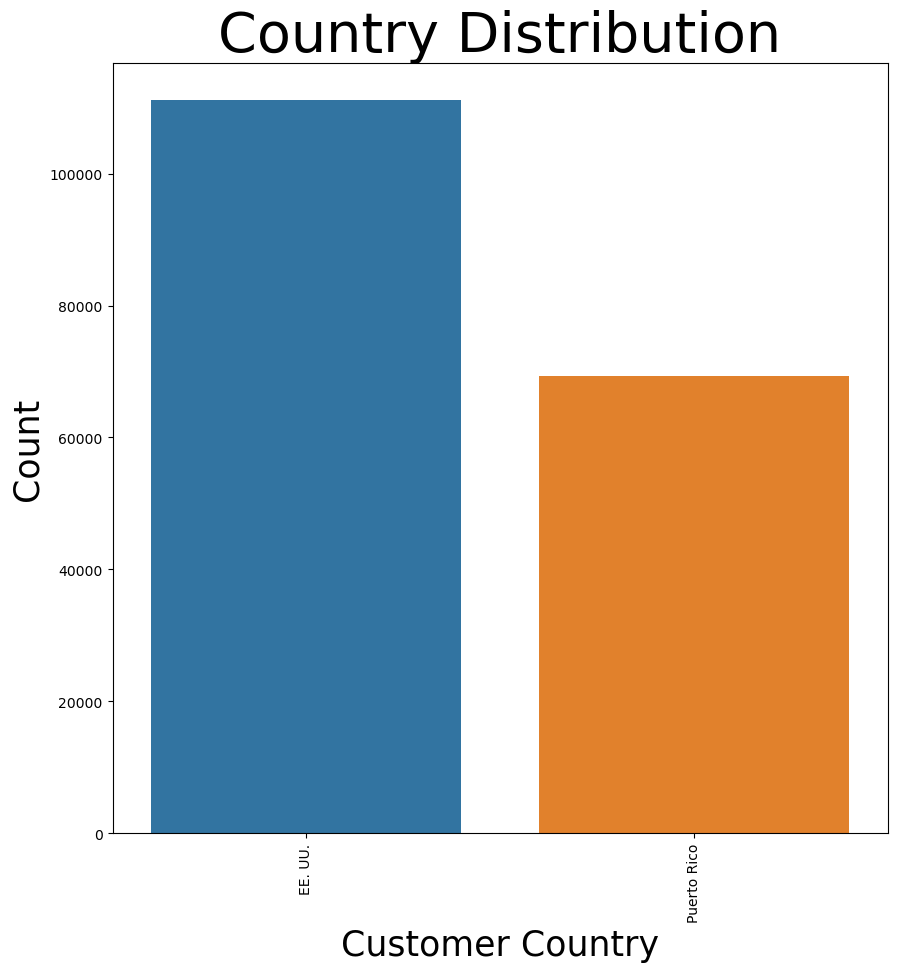

In [16]:
country_counts = df_clean['Customer Country'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.xticks(rotation='vertical')
plt.title('Country Distribution', fontsize=40)
plt.ylabel('Count', fontsize=25)
plt.xlabel('Customer Country', fontsize=25)
plt.show()


## City wise Distribution

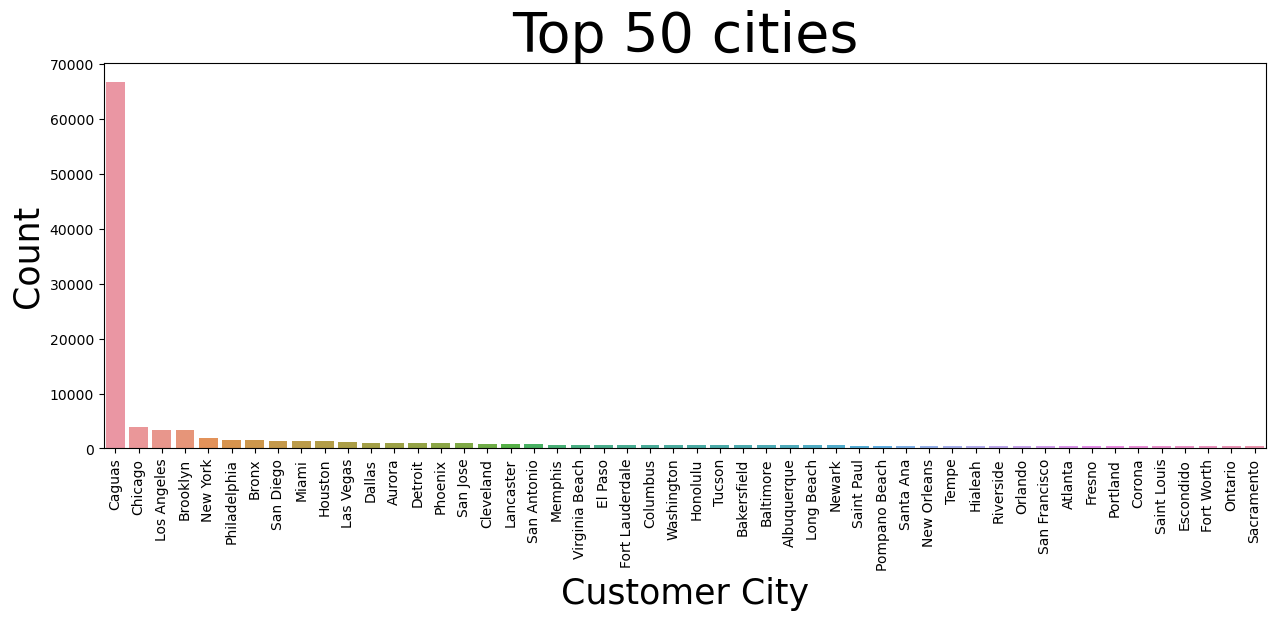

In [21]:
city_counts = df_clean['Customer City'].value_counts().sort_values(ascending=False).head(50)
plt.figure(figsize=(15,5))
sns.barplot(x=city_counts.index, y=city_counts.values)
plt.xticks(rotation='vertical')
plt.title('Top 50 cities', fontsize=40)
plt.ylabel('Count', fontsize=25)
plt.xlabel('Customer City', fontsize=25)
plt.show()

## Is there a correlation between late delivery and Customer City?

In [22]:
Cities_Late = df_clean.loc[df_clean["Delivery Status"] == "Late delivery", ["Customer City"]]

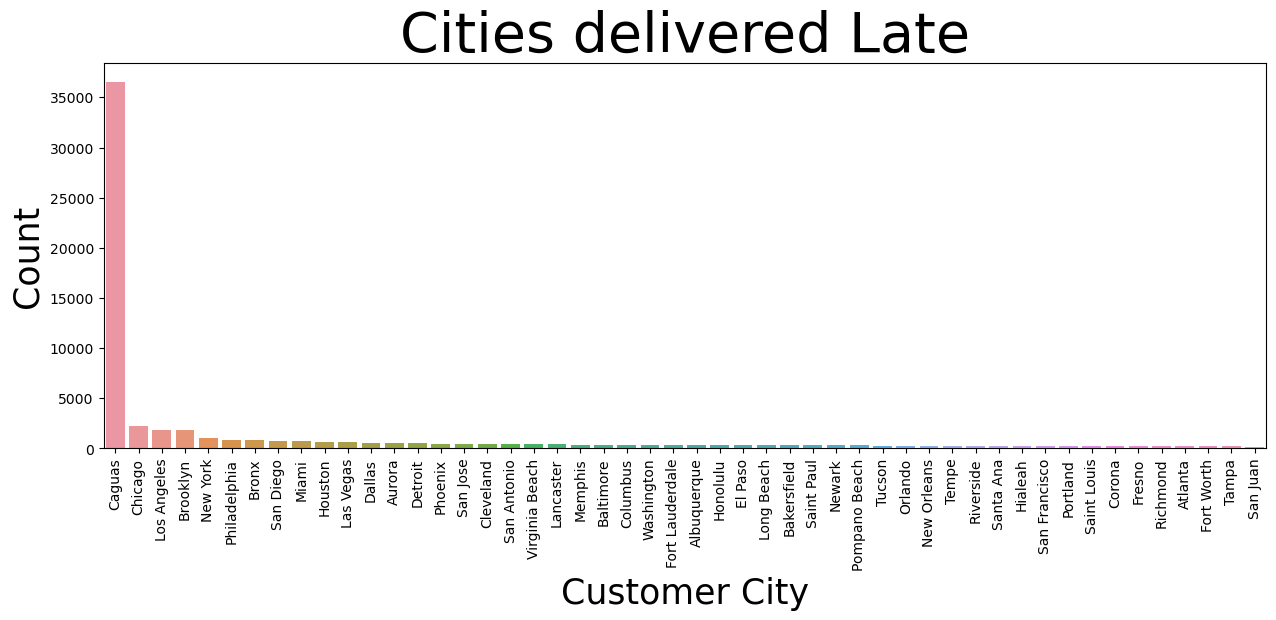

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(x="Customer City", data=Cities_Late, order=Cities_Late['Customer City'].value_counts().sort_values(ascending=False).head(50).index)
plt.xticks(rotation='vertical')
plt.title('Cities delivered Late', fontsize=40)
plt.ylabel('Count', fontsize=25)
plt.xlabel('Customer City', fontsize=25)
plt.show()

- There is no relation between lte delivery and customer location as well.

## Customer Segment Distribution?


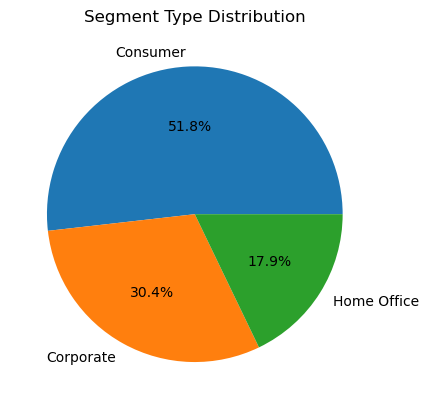

In [25]:
Segment_counts = df_clean['Customer Segment'].value_counts()
plt.pie(Segment_counts, labels=Segment_counts.index, autopct='%1.1f%%')
plt.title('Segment Type Distribution')
plt.show()


- 51.8% of customers are consumers.
- 30.4% are corporates.
- 17.9% people are from home office category.

## Shipping Mode Analysis

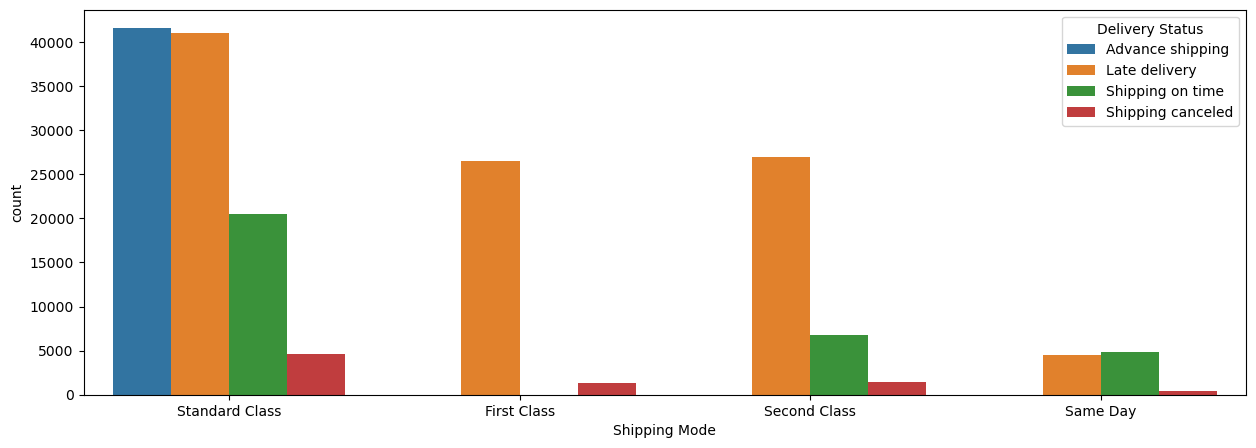

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(x ='Shipping Mode',hue='Delivery Status' ,data = df_clean)
plt.show()

- Standard Class is the most popular shipping mode
- Late delivey is even observed in first class shipping mode.

## Summary

1. Delivery Status
- 54.8% orders were delivered late.
- 23% orders were shipped in advance.
- 17.8% orders were shipped on time.
- 4.3% of shipping were canceled
2. Payment Type Distribution
- 38.4% people used debit payment.
- 27.6% people used transfer sysytem.
- 23.1% people used payment system.
- 10.9% people used cash payment.
3. Benefit per Order
- Highest average benefit per order was done for computers and lowest was for CDs
- Delayed Deliveries and Categories Relationship
- There is no clear relationship between category and late delivery, as the distribution of categories and the categories delivered late appear to be    proportional.
4. Category Distribution
- Cleats were the top selling category and Golf Bags & Carts were the lowest selling category
Highest Selling Product
- Perfect Fitness Perfect Rip Deck were the highest selling product.
- There is no relationship between delayed deliveries and Customer Location
5. Segment Type Distribution
- 51.8% of customers are consumers.
- 30.4% are corporates.
- 17.9% people are from home office category.
6. Shipping Mode Analysis
- Standard Class is the most popular shipping mode
Late delivey is even observed in first class shipping mode.